In [1]:
# ===============================
# Organoid Learning Evaluation
# ===============================

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from org_learning_eval.OrgLearningEval import OrgLearningEval  # if using class


In [2]:
import sys
import os

# Add the parent folder of this notebook to the Python path
module_path = os.path.abspath(os.path.join(''))
if module_path not in sys.path:
    sys.path.append(module_path)


Loaded default dataset: 'Baseline'


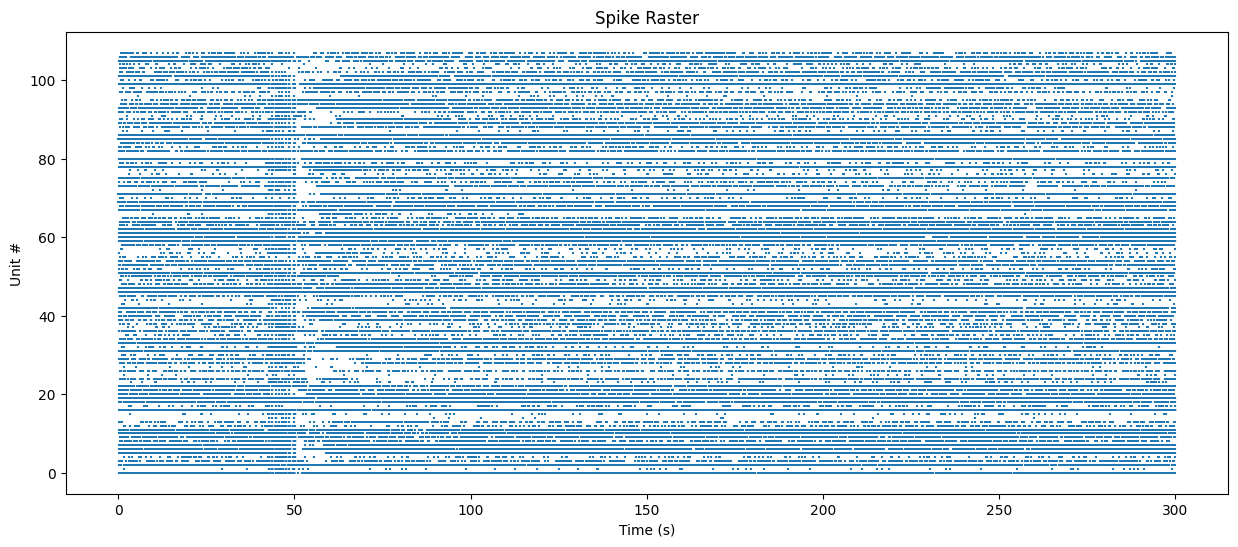

In [67]:
from OrgLearningEval import OrgLearningEval

ole = OrgLearningEval()  # Should load "Baseline" and print confirmation
ole.show_raster()        # Should show a plot if the dataset loaded correctly


In [68]:
# Load Logs
log_paths = {
    "Adaptive": "data/exp1_cartpole_long_6_logs.pkl",
    "Random": "data/exp1_cartpole_long_7_logs.pkl",
    "Null":    "data/exp1_cartpole_long_8_logs.pkl"
}
log_data = {k: pickle.load(open(v, "rb")) for k, v in log_paths.items()}

In [69]:
paths = {
    "Baseline": "data/baseline_spike_data.pkl",
    "Adaptive": "data/exp1_cartpole_long_6_spike_data.pkl",
    "Random":   "data/exp1_cartpole_long_7_spike_data.pkl",
    "None":     "data/exp1_cartpole_long_8_spike_data.pkl"
}

# Check if each file exists
for label, path in paths.items():
    print(f"{label}: {' Found' if os.path.exists(path) else ' MISSING'}")


Baseline:  Found
Adaptive:  Found
Random:  Found
None:  Found


In [70]:
from core.data_loader import load_datasets

datasets = load_datasets(paths)
for key, sd in datasets.items():
    print(f"{key}: loaded type = {type(sd)}")

Baseline: loaded type = <class 'spikedata.spikedata.SpikeData'>
Adaptive: loaded type = <class 'spikedata.spikedata.SpikeData'>
Random: loaded type = <class 'spikedata.spikedata.SpikeData'>
None: loaded type = <class 'spikedata.spikedata.SpikeData'>


Switched to dataset: Adaptive


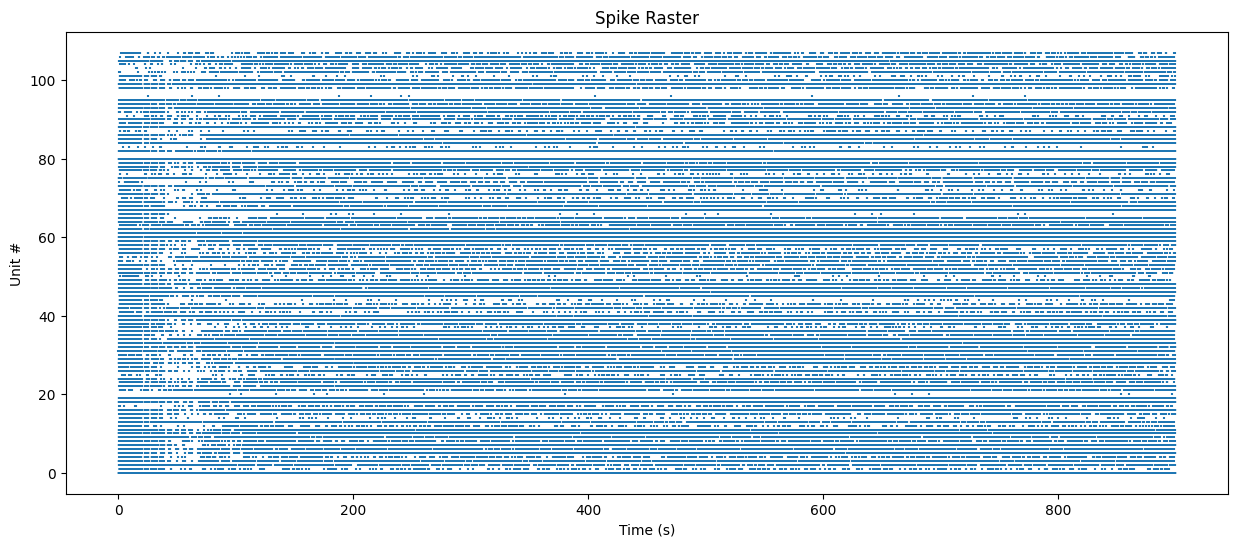

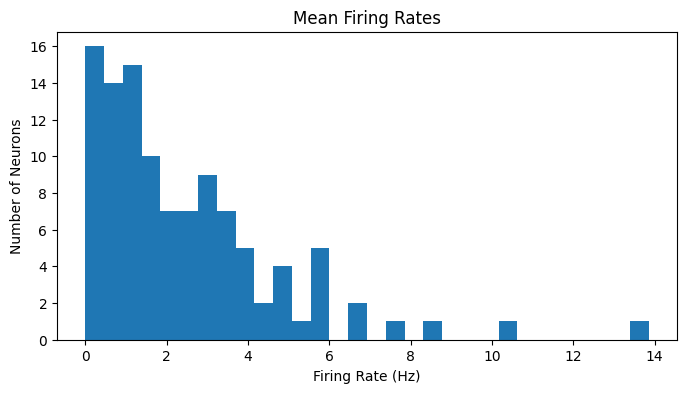

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


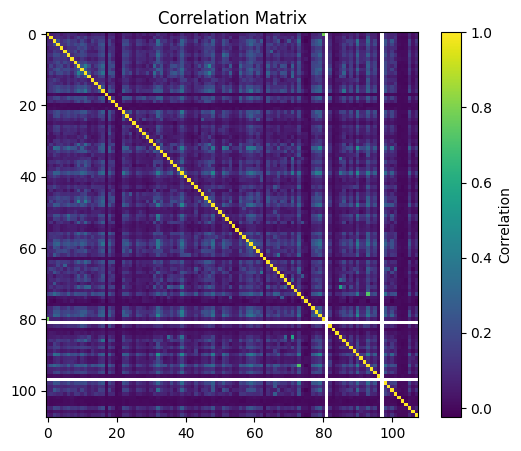

In [71]:
ole.set_dataset("Adaptive")
ole.show_raster()
ole.show_mean_firing_rates()
ole.show_correlation_matrix()


In [72]:
# Inspect structure
print("causal_info keys:", list(causal_info.keys()))
print("metadata keys:", list(metadata.keys()))


causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
metadata keys: ['mapping', 'fs', 'stim_electrodes', 'stim_inds', 'encode_electrodes', 'encode_inds', 'decode_electrodes', 'training_electrodes', 'training_inds', 'spike_channels', 'spike_locs']


In [74]:
adaptive_logs = log_data["Adaptive"]
reward_df = adaptive_logs["reward"]


In [75]:
reward_df.head()


,time,episode,reward
0,3.911218,0,19.0
1,18.770805,1,56.0
2,24.654084,2,12.0
3,31.596691,3,17.0
4,38.112137,4,15.0


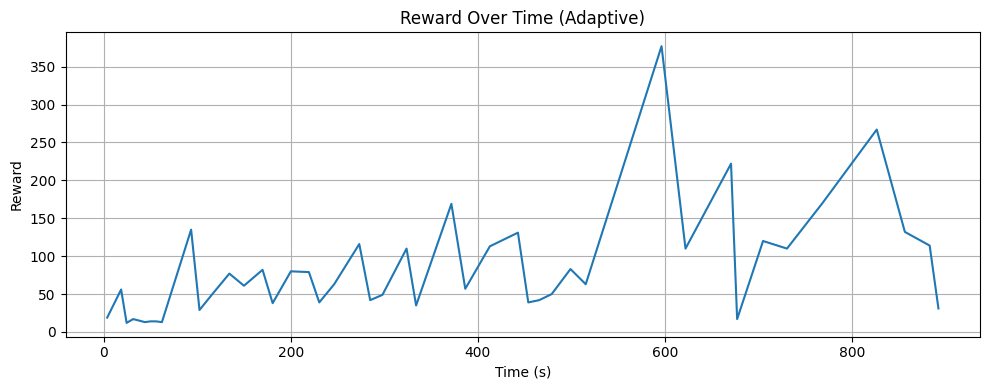

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(reward_df["time"], reward_df["reward"], label="Reward")
plt.xlabel("Time (s)")
plt.ylabel("Reward")
plt.title("Reward Over Time (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.show()

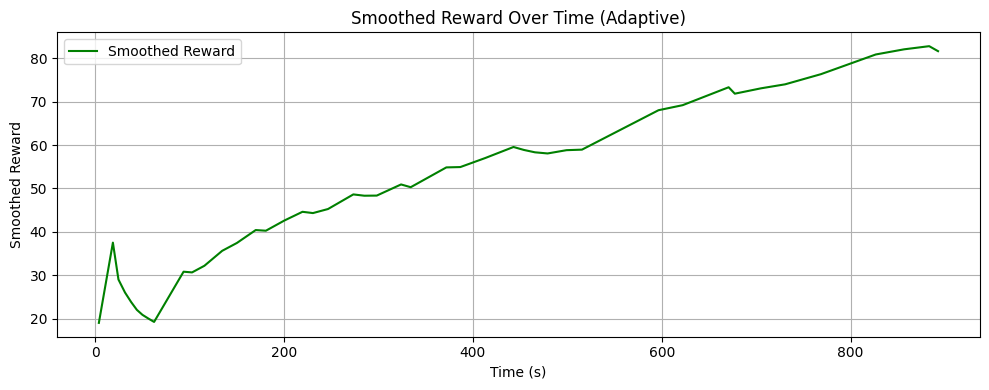

In [77]:
reward_df["reward_smooth"] = reward_df["reward"].rolling(window=50, min_periods=1).mean()

plt.figure(figsize=(10, 4))
plt.plot(reward_df["time"], reward_df["reward_smooth"], label="Smoothed Reward", color="green")
plt.xlabel("Time (s)")
plt.ylabel("Smoothed Reward")
plt.title("Smoothed Reward Over Time (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


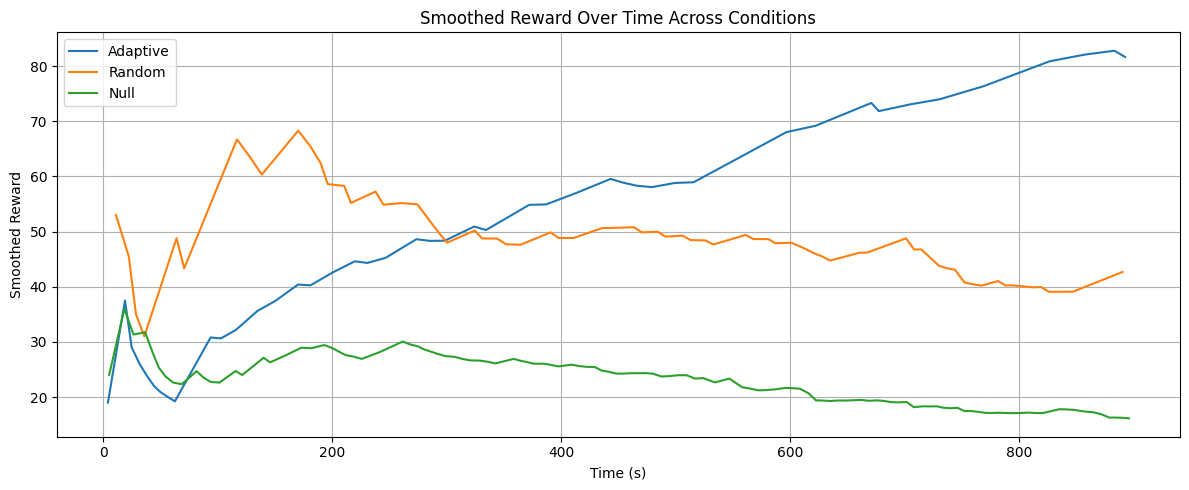

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

for label, logs in log_data.items():
    reward_df = logs["reward"].copy()
    reward_df["reward_smooth"] = reward_df["reward"].rolling(window=50, min_periods=1).mean()
    plt.plot(reward_df["time"], reward_df["reward_smooth"], label=label)

plt.xlabel("Time (s)")
plt.ylabel("Smoothed Reward")
plt.title("Smoothed Reward Over Time Across Conditions")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
mapping_df = metadata["mapping"]

# Show the first few rows
mapping_df.head()

,channel,electrode,x,y
0,0,18598,2065.0,1470.0
1,1,20644,3220.0,1627.5
2,2,19040,2100.0,1505.0
3,3,21723,2852.5,1715.0
4,4,14939,3482.5,1172.5


In [42]:
print(first_order.shape)  # confirm it's (N, N)


(10, 10)


In [56]:
print("Training electrodes:", metadata["training_electrodes"])
print("Encode electrodes:", metadata["encode_electrodes"])
print("Decode electrodes:", metadata["decode_electrodes"])


Training electrodes: [24768, 22182, 23923, 909, 3229, 17335]
Encode electrodes: [23275, 25039]
Decode electrodes: [18429, 18385]


In [57]:
encode_local = [0, 1]  # or any valid indices from 0 to 9
decode_local = [8, 9]  # also from 0 to 9

In [58]:
first_order = causal_info["first_order_connectivity"]
multi_order = causal_info["multi_order_connectivity"]
burst_percent = causal_info["burst_percent"]

c1_values = [first_order[i, j] for i in encode_local for j in decode_local]
cm_values = [multi_order[i, j] for i in encode_local for j in decode_local]
burst_values = [burst_percent[j] for j in decode_local]

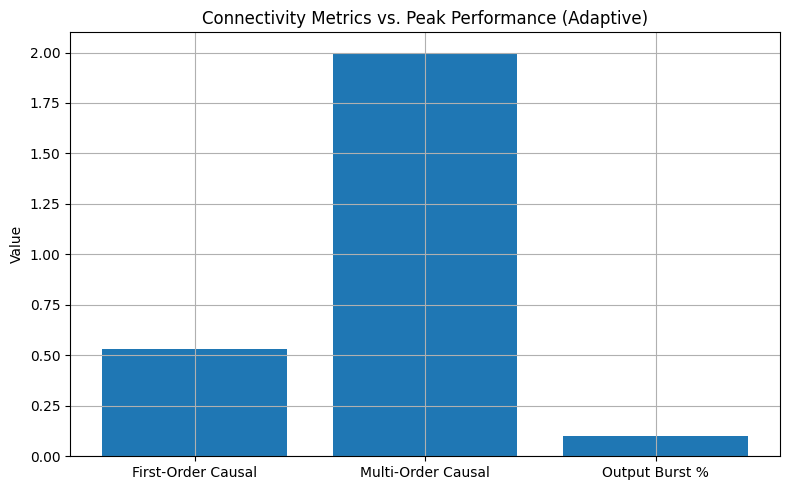

In [59]:
metrics = ["First-Order Causal", "Multi-Order Causal", "Output Burst %"]
values = [np.mean(c1_values), np.mean(cm_values), np.mean(burst_values)]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.ylabel("Value")
plt.title("Connectivity Metrics vs. Peak Performance (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
indices = list(range(10))  # 10 training neurons

c1_values = [first_order[i, j] for i in indices for j in indices if i != j]
cm_values = [multi_order[i, j] for i in indices for j in indices if i != j]
burst_values = [burst_percent[j] for j in indices]

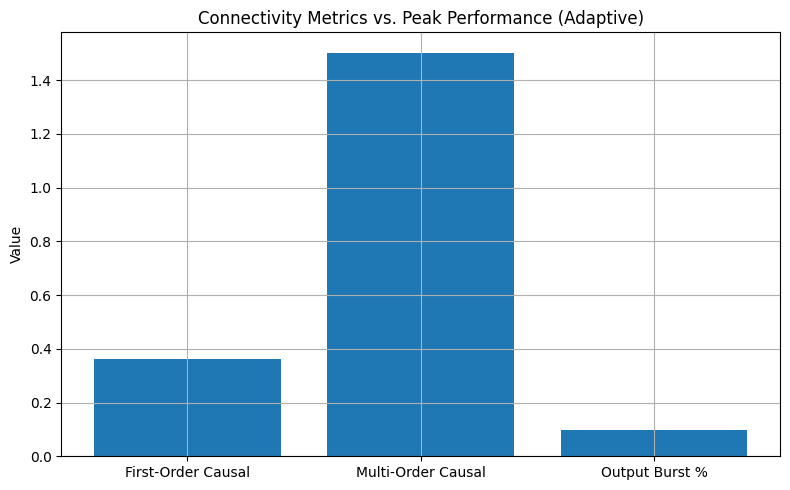

In [61]:
metrics = ["First-Order Causal", "Multi-Order Causal", "Output Burst %"]
values = [np.mean(c1_values), np.mean(cm_values), np.mean(burst_values)]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.ylabel("Value")
plt.title("Connectivity Metrics vs. Peak Performance (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.show()

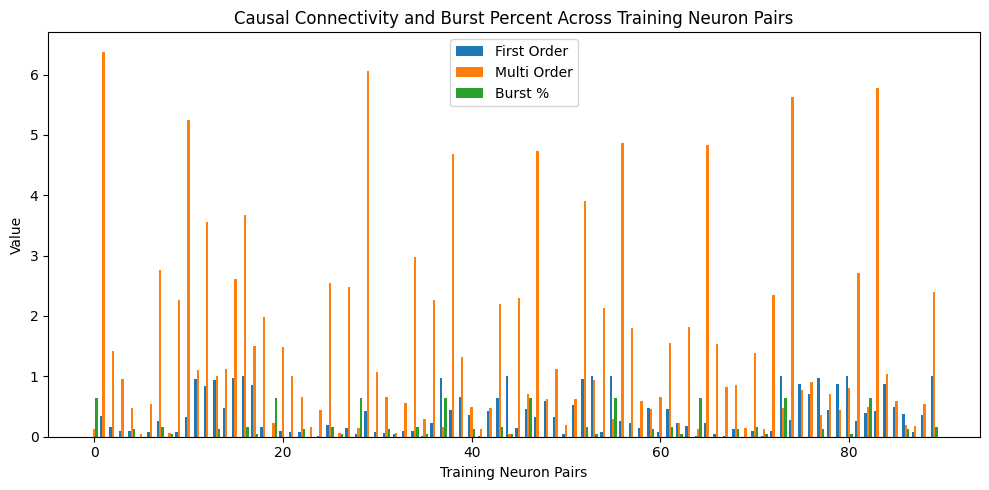

In [62]:
import matplotlib.pyplot as plt

# Use 10 training neurons: local indices 0–9
training_pairs = [(i, j) for i in range(10) for j in range(10) if i != j]

# Extract causal values
first_vals = [first_order[i, j] for i, j in training_pairs]
multi_vals = [multi_order[i, j] for i, j in training_pairs]
burst_vals = [burst_percent[j] for _, j in training_pairs]  # burst of post-synaptic unit

# Plotting
plt.figure(figsize=(10, 5))
bar_width = 0.25
x = range(len(training_pairs))

plt.bar([xi - bar_width for xi in x], first_vals, width=bar_width, label='First Order')
plt.bar(x, multi_vals, width=bar_width, label='Multi Order')
plt.bar([xi + bar_width for xi in x], burst_vals, width=bar_width, label='Burst %')

plt.xlabel('Training Neuron Pairs')
plt.ylabel('Value')
plt.title('Causal Connectivity and Burst Percent Across Training Neuron Pairs')
plt.legend()
plt.tight_layout()
plt.show()


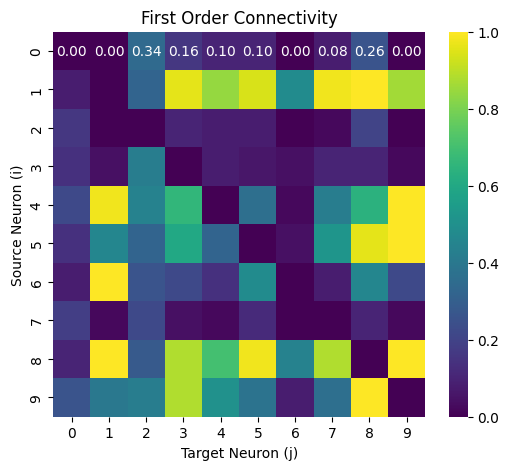

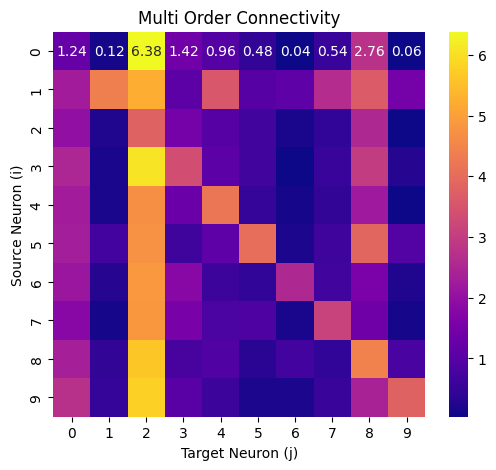

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for first_order
plt.figure(figsize=(6, 5))
sns.heatmap(first_order, annot=True, fmt=".2f", cmap='viridis')
plt.title("First Order Connectivity")
plt.xlabel("Target Neuron (j)")
plt.ylabel("Source Neuron (i)")
plt.show()

# Heatmap for multi_order
plt.figure(figsize=(6, 5))
sns.heatmap(multi_order, annot=True, fmt=".2f", cmap='plasma')
plt.title("Multi Order Connectivity")
plt.xlabel("Target Neuron (j)")
plt.ylabel("Source Neuron (i)")
plt.show()


In [87]:
pattern_log = log_data["Adaptive"]["pattern"]
print("Pattern log type:", type(pattern_log))
print("\nColumns:")
print(pattern_log.columns)
print("\nSample:")
print(pattern_log.head())


Pattern log type: <class 'pandas.core.frame.DataFrame'>

Columns:
Index(['time', 'reward', 'stim_indices'], dtype='object')

Sample:
        time  reward stim_indices
0   3.911506    19.0       [4, 3]
1   4.019525    19.0       [4, 3]
2   4.128859    19.0       [4, 3]
3   4.237211    19.0       [4, 3]
4  18.771035    56.0       [6, 5]


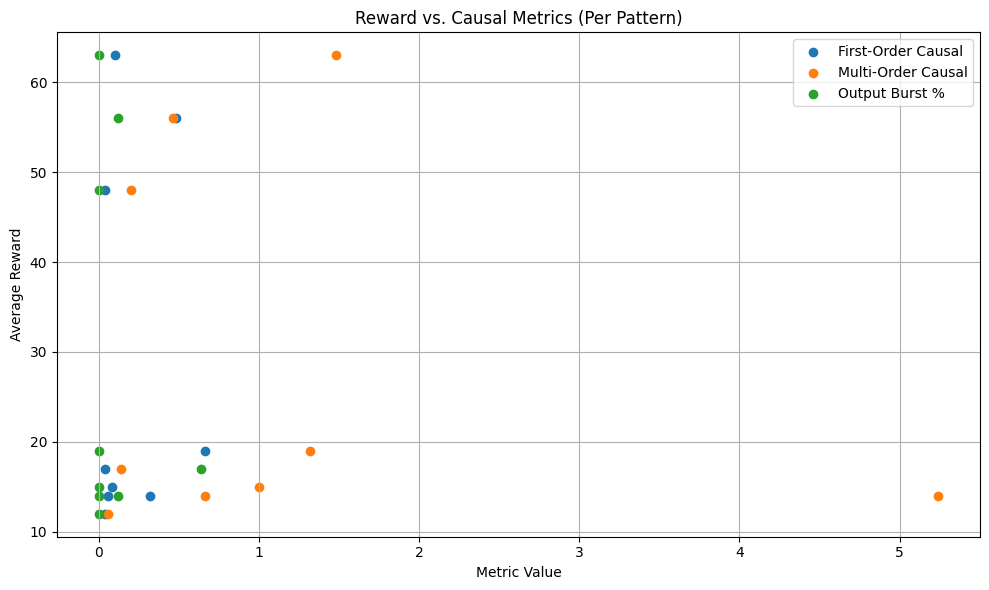

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Get causal metrics and mapping
first_order = causal_info["first_order_connectivity"]
multi_order = causal_info["multi_order_connectivity"]
burst_percent = causal_info["burst_percent"]
training_inds = metadata["training_inds"]

# Make stim_indices hashable
pattern_log["stim_key"] = pattern_log["stim_indices"].apply(tuple)

# Compute mean reward per pattern
pattern_rewards = pattern_log.groupby("stim_key")["reward"].mean()

# Collect metrics per stimulation pattern
rows = []
for stim_key, avg_reward in pattern_rewards.items():
    if len(stim_key) != 2:
        continue  # skip malformed patterns
    stim_i, stim_j = stim_key

    # Look up causal metrics and burst
    c1 = first_order[stim_i, stim_j]
    cm = multi_order[stim_i, stim_j]
    burst = burst_percent[stim_j]

    rows.append({
        "Pattern": f"{stim_i}-{stim_j}",
        "AvgReward": avg_reward,
        "FirstOrder": c1,
        "MultiOrder": cm,
        "Burst": burst
    })

df = pd.DataFrame(rows)

# === Plot ===
plt.figure(figsize=(10, 6))
plt.scatter(df["FirstOrder"], df["AvgReward"], label="First-Order Causal")
plt.scatter(df["MultiOrder"], df["AvgReward"], label="Multi-Order Causal")
plt.scatter(df["Burst"], df["AvgReward"], label="Output Burst %")
plt.xlabel("Metric Value")
plt.ylabel("Average Reward")
plt.title("Reward vs. Causal Metrics (Per Pattern)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


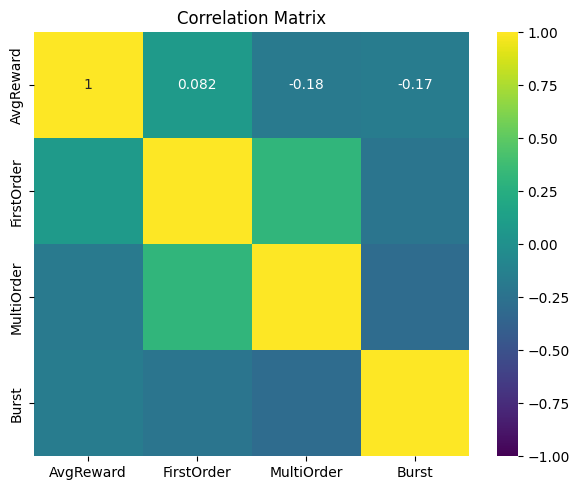

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
metrics_df = df[["AvgReward", "FirstOrder", "MultiOrder", "Burst"]]

# Compute correlation matrix
corr = metrics_df.corr()

# Plot correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="viridis", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


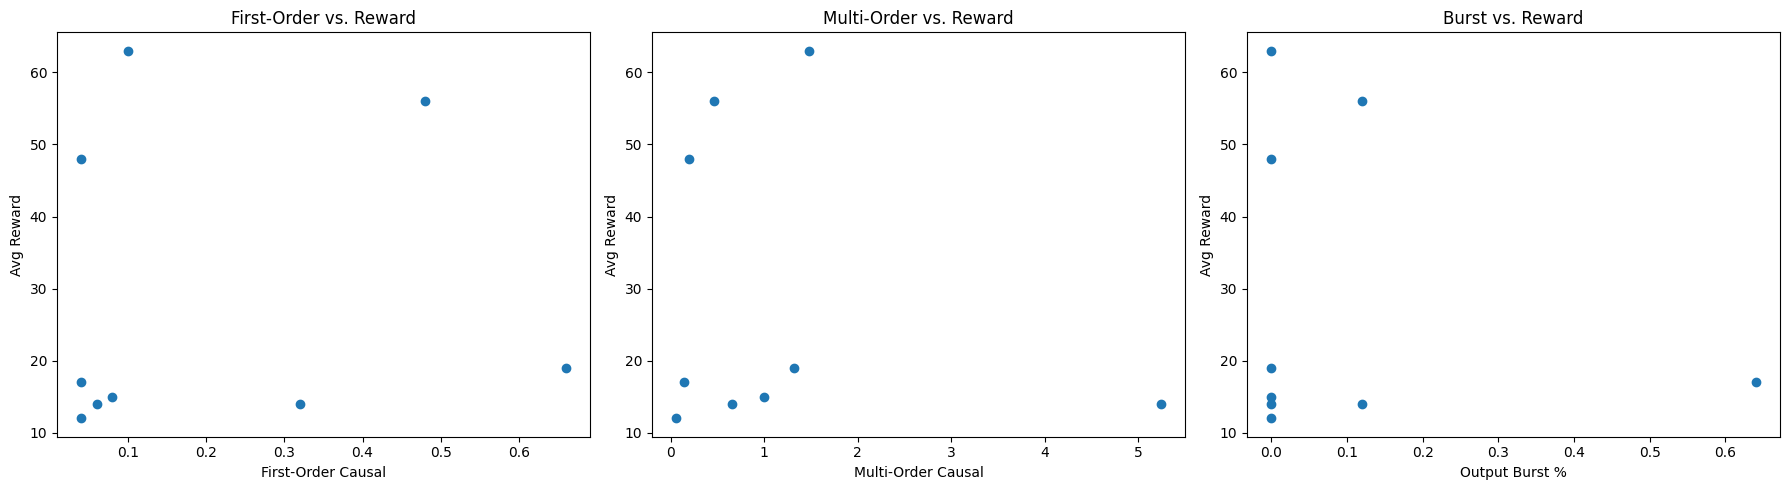

In [95]:
# Assumes `df` has columns: "AvgReward", "FirstOrder", "MultiOrder", "Burst"
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Scatter: AvgReward vs FirstOrder
axs[0].scatter(df["FirstOrder"], df["AvgReward"])
axs[0].set_xlabel("First-Order Causal")
axs[0].set_ylabel("Avg Reward")
axs[0].set_title("First-Order vs. Reward")

# Scatter: AvgReward vs MultiOrder
axs[1].scatter(df["MultiOrder"], df["AvgReward"])
axs[1].set_xlabel("Multi-Order Causal")
axs[1].set_ylabel("Avg Reward")
axs[1].set_title("Multi-Order vs. Reward")

# Scatter: AvgReward vs Burst
axs[2].scatter(df["Burst"], df["AvgReward"])
axs[2].set_xlabel("Output Burst %")
axs[2].set_ylabel("Avg Reward")
axs[2].set_title("Burst vs. Reward")

plt.tight_layout()
plt.show()


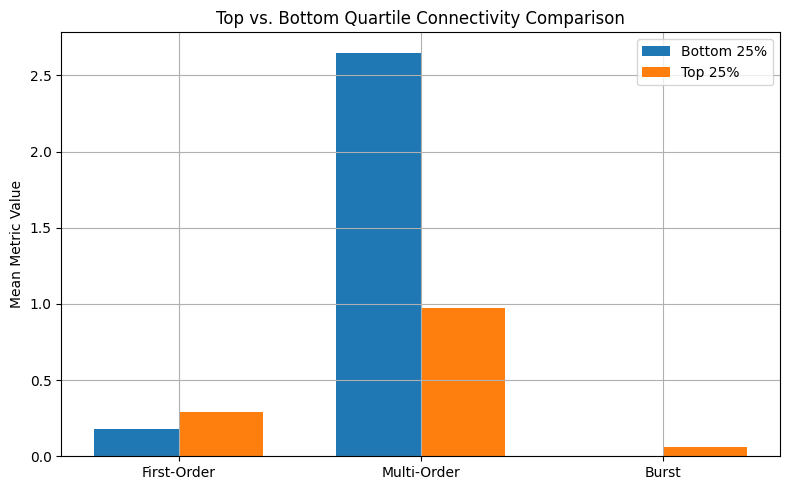

In [96]:
# Sort by AvgReward
df_sorted = df.sort_values("AvgReward")

# Define quartile size
n = len(df_sorted) // 4

# Split into top and bottom quartiles
bottom_q = df_sorted.iloc[:n]
top_q = df_sorted.iloc[-n:]

# Compute means
metrics = ["FirstOrder", "MultiOrder", "Burst"]
top_means = [top_q[m].mean() for m in metrics]
bottom_means = [bottom_q[m].mean() for m in metrics]

# Plot
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, bottom_means, width, label="Bottom 25%")
plt.bar(x + width/2, top_means, width, label="Top 25%")

plt.xticks(x, ["First-Order", "Multi-Order", "Burst"])
plt.ylabel("Mean Metric Value")
plt.title("Top vs. Bottom Quartile Connectivity Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [97]:
print(df.columns)
print(df.head())

Index(['Pattern', 'AvgReward', 'FirstOrder', 'MultiOrder', 'Burst'], dtype='object')
  Pattern  AvgReward  FirstOrder  MultiOrder  Burst
0     1-2       14.0        0.32        5.24   0.00
1     2-3       63.0        0.10        1.48   0.00
2     2-4       15.0        0.08        1.00   0.00
3     3-1       17.0        0.04        0.14   0.64
4     3-5       14.0        0.06        0.66   0.12


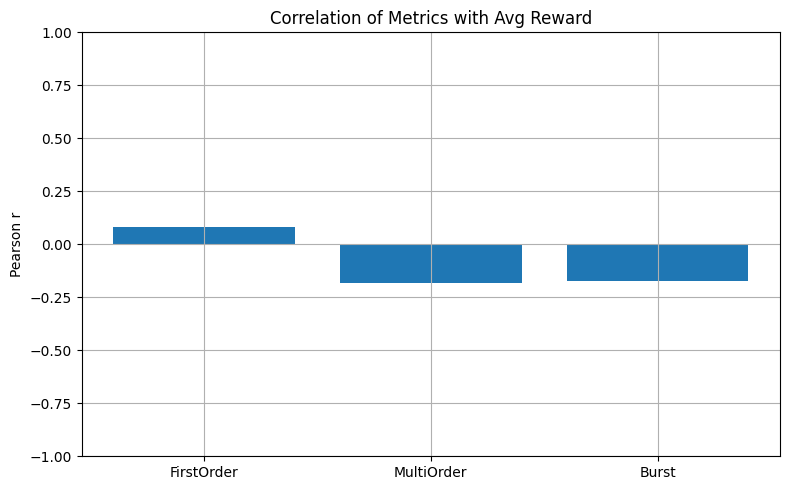

In [98]:
from scipy.stats import pearsonr

# Compute Pearson correlations with AvgReward
metrics = ["FirstOrder", "MultiOrder", "Burst"]
correlations = []

for metric in metrics:
    r, _ = pearsonr(df[metric], df["AvgReward"])
    correlations.append(r)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(metrics, correlations)
plt.ylim(-1, 1)
plt.ylabel("Pearson r")
plt.title("Correlation of Metrics with Avg Reward")
plt.grid(True)
plt.tight_layout()
plt.show()
